In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/Users/Sensei/.pyenv/versions/3.9.0/lib/python3.9/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [77]:
def plot_fig(output,protocol,n_clients,save_file_name=None):
    rtt = [f'{output}/rtt_{i}.csv' for i in range(n_clients)]
    n_pkts = 116
    sums = np.zeros(116)

    rtt_mat = [np.loadtxt(rtt[i],delimiter=',',dtype=np.int64) for i in range(n_clients)]
    
    for m in rtt_mat:
        for r in m:
            sums[r[0]] += r[1]
            
    avgs = sums/(n_clients-1)
    print(avgs.mean())
    
    plt.plot(avgs/1000)
    plt.title(f"Plot of chunk RTT's with {protocol} control layer")
    plt.grid(visible=True)
    plt.xlabel("chunk id")
    plt.ylabel("time (ms)")
    
    if (save_file_name):
        plt.savefig(save_file_name, bbox_inches='tight', dpi=150)

33423.1099137931


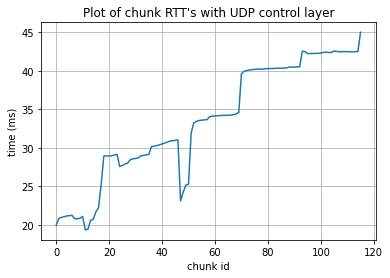

In [78]:
plot_fig("output_2","UDP",5,save_file_name="report/udp_plot.pdf")

21011.316810344826


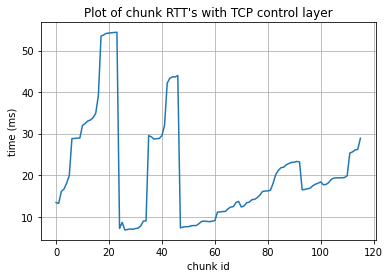

In [83]:
plot_fig("output_tcp","TCP",5)

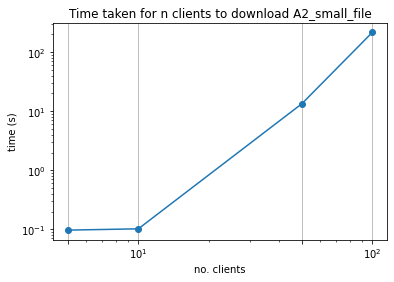

In [3]:
n_clts = [5,10,50,100]
times = np.array([97,102,13407,216329])

plt.plot(n_clts, times/1000, marker='o')
plt.yscale('log')
plt.xscale('log')
plt.xticks([5,10,50,100])
plt.grid(visible=True,axis='x')
plt.title("Time taken for n clients to download A2_small_file")
plt.xlabel("no. clients")
plt.ylabel("time (s)")
plt.savefig("../../../Programming/blog/content/articles/2022/res/time_clients.svg", bbox_inches='tight', dpi=150)

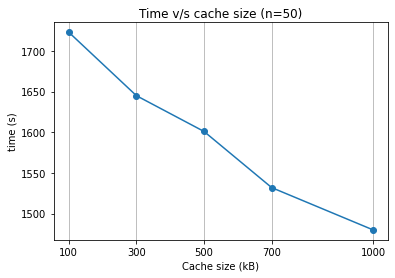

In [95]:
cache_size = [100, 300, 500, 700, 1000]
times = np.array([1723,1645,1601,1532,1480])

plt.plot(cache_size, times, marker='o')
plt.xticks(cache_size)
plt.grid(visible=True,axis='x')
plt.title("Time v/s cache size (n=50)")
plt.xlabel("Cache size (kB)")
plt.ylabel("time (s)")
plt.savefig("time_cache.pdf", bbox_inches='tight', dpi=150)

In [87]:
24*60

1440

54920.13362068965


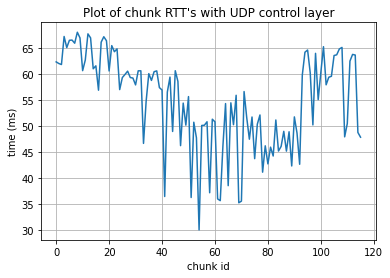

In [82]:
plot_fig("output_2","UDP",5,save_file_name="report/random_req.pdf")